# Glider plotting

## Loading libraries

In [5]:
#!pip list   #list all of the packages 

# for loading data and calculations
import xarray as xr
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
import matplotlib as mat
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

import cmocean
import numpy as np

# for creating glider map
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## Loading data

In [6]:
filename = r'../data/IMOS_ANFOG_BCEOPSTUVN_20150521T004128Z_SL416_FV01_timeseries_END-20150530T131213Z.nc'
#glider_data = xr.open_dataset(filename).TEMP
#glider_data = xr.open_dataset(filename).
glider_data = xr.open_dataset(filename)
# glider_data_t = xr.open_dataset(filename).TEMP
# glider_data_s = xr.open_dataset(filename).PSAL
# convert from data set to data frame for easier plotting later
# glider_data_frame = xr.Dataset.to_dataframe(glider_data)
glider_data_frame = xr.Dataset.to_dataframe(glider_data)
type(glider_data_frame) 


pandas.core.frame.DataFrame

In [7]:
glider_data_frame

,PLATFORM,DEPLOYMENT,SENSOR1,SENSOR2,SENSOR3,SENSOR4,LATITUDE,LATITUDE_quality_control,LONGITUDE,LONGITUDE_quality_control,...,DOX1,DOX1_quality_control,CPHL,CPHL_quality_control,CDOM,CDOM_quality_control,VBSC,VBSC_quality_control,NTRA,NTRA_quality_control
TIME,,,,,,,,,,,,,,,,,,,,,
2015-05-21 00:41:28.892494848,b'',b'',b'',b'',b'',b'',-23.418032,1.0,151.878610,1.0,...,183.187976,1.0,0.155421,1.0,0.233587,1.0,0.000190,1.0,6.119894,1.0
2015-05-21 00:41:34.885703168,b'',b'',b'',b'',b'',b'',-23.418037,1.0,151.878603,1.0,...,183.106154,1.0,0.146607,1.0,-0.067931,4.0,0.000192,1.0,6.433237,1.0
2015-05-21 00:41:40.996412416,b'',b'',b'',b'',b'',b'',-23.418050,1.0,151.878580,1.0,...,183.001083,1.0,0.146000,1.0,0.262380,1.0,0.000180,1.0,6.752724,1.0
2015-05-21 00:41:46.895947776,b'',b'',b'',b'',b'',b'',-23.418078,1.0,151.878558,1.0,...,183.021030,1.0,0.163378,1.0,0.543000,1.0,0.000222,1.0,7.061169,1.0
2015-05-21 00:41:52.910318848,b'',b'',b'',b'',b'',b'',-23.418115,1.0,151.878513,1.0,...,183.216169,1.0,0.219617,1.0,0.512396,1.0,0.000247,1.0,7.375619,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-30 13:11:49.984105728,b'',b'',b'',b'',b'',b'',NaN,9.0,NaN,9.0,...,154.947252,0.0,0.269260,0.0,0.798883,0.0,0.000323,0.0,13.616533,1.0
2015-05-30 13:11:55.853577216,b'',b'',b'',b'',b'',b'',NaN,9.0,NaN,9.0,...,154.989846,0.0,0.255874,0.0,0.549960,0.0,0.000291,0.0,13.632190,1.0
2015-05-30 13:12:01.888989952,b'',b'',b'',b'',b'',b'',NaN,9.0,NaN,9.0,...,154.960369,0.0,0.256760,0.0,0.558617,0.0,0.000251,0.0,13.648290,1.0


In [8]:
glider_data_frame['PSAL']

TIME
2015-05-21 00:41:28.892494848    35.510446
2015-05-21 00:41:34.885703168    35.512064
2015-05-21 00:41:40.996412416    35.496603
2015-05-21 00:41:46.895947776    35.432403
2015-05-21 00:41:52.910318848    35.503798
                                   ...    
2015-05-30 13:11:49.984105728    35.613811
2015-05-30 13:11:55.853577216    35.613942
2015-05-30 13:12:01.888989952    35.614180
2015-05-30 13:12:07.863529984    35.614707
2015-05-30 13:12:13.989568000          NaN
Name: PSAL, Length: 128646, dtype: float64

In [9]:
glider_data.TEMP

<xarray.DataArray 'TEMP' (TIME: 128646)>
array([24.9363  , 24.9358  , 24.9468  , ..., 22.6363  , 22.637328,       nan])
Coordinates:
    LATITUDE   (TIME) float64 -23.42 -23.42 -23.42 -23.42 ... nan nan nan nan
    LONGITUDE  (TIME) float64 151.9 151.9 151.9 151.9 151.9 ... nan nan nan nan
  * TIME       (TIME) datetime64[ns] 2015-05-21T00:41:28.892494848 ... 2015-0...
    DEPTH      (TIME) float64 0.1789 0.1391 0.2186 0.7154 ... nan nan nan nan
Attributes:
    standard_name:        sea_water_temperature
    long_name:            sea_water_temperature
    units:                Celsius
    valid_min:            -2.5
    valid_max:            40.0
    ancillary_variables:  TEMP_quality_control
    observation_type:     measured
    quality_control_set:  1
    comment:              Data have been corrected for sensor time response. ...

## Select variables

In [17]:
TEMP = glider_data.TEMP
PSAL = glider_data.PSAL
TIME = glider_data.TIME

## Create QC variables and apply QC to data

In [12]:
# temperature
TEMP_QC_index = glider_data.TEMP_quality_control
TEMP_QC_index_01 = TEMP_QC_index == 1
TEMP_QC = TEMP[TEMP_QC_index_01]

In [15]:
#practical salinity
PSAL_QC_index = glider_data.PSAL_quality_control
PSAL_QC_index_01 = PSAL_QC_index == 1
PSAL_QC = PSAL[PSAL_QC_index_01]

## T-S Diagram 

In [36]:
TS_QC_bool = np.logical_and(TEMP_QC_index_01,PSAL_QC_index_01)
PSAL_QC_TS = PSAL[TS_QC_bool]
TEMP_QC_TS = TEMP[TS_QC_bool]

## Timeseries

In [18]:
TEMP_TIME_QC = TIME[TEMP_QC_index_01]

## Glider locations

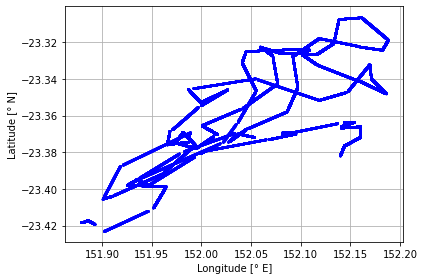

In [20]:
#plt.figure(figure=(10,8))
plt.plot(glider_data.LONGITUDE,glider_data.LATITUDE,marker='o',color='b',markersize=1,label='Glider data', linestyle='None')
plt.xlabel('Longitude [\u00b0 E]')
plt.ylabel('Latitude [\u00b0 N]')
plt.grid()
plt.tight_layout()

Text(0, 0.5, 'Latitude')

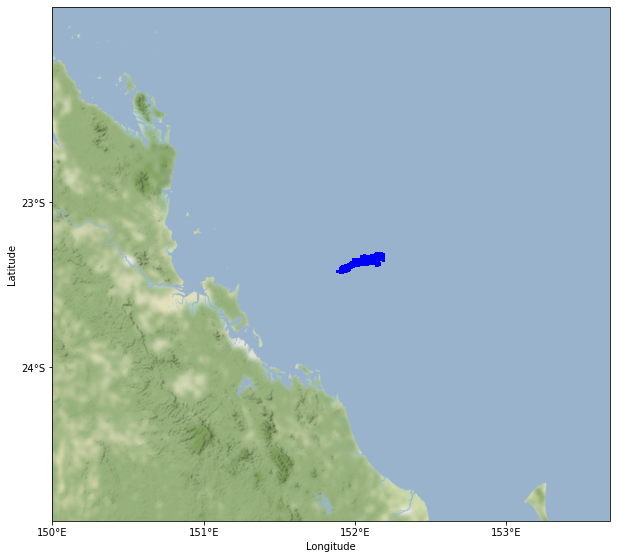

In [27]:
LONG_min = xr.DataArray.min(glider_data.LONGITUDE)
LONG_max = xr.DataArray.max(glider_data.LONGITUDE)
LAT_min = xr.DataArray.min(glider_data.LATITUDE)
LAT_max = xr.DataArray.max(glider_data.LATITUDE)

stamen_terrain = cimgt.Stamen('terrain-background')
fig = plt.figure(figsize=(10,20))

# Create a GeoAxes in the tile's projection.
# ax1 = fig.add_subplot(1,2,1,projection=stamen_terrain.crs)
# ax2 = fig.add_subplot(1,2,2,projection=stamen_terrain.crs)

ax1 = plt.axes(projection=stamen_terrain.crs)  # standard axes
ax1.set_extent([LONG_min-1.5,LONG_max+1.5, LAT_min-1.5,LAT_max+1.5],crs=ccrs.PlateCarree())
ax1.add_image(stamen_terrain,8)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_xticks([150,151,152,153],crs=ccrs.PlateCarree())
ax1.set_yticks([-24,-23],crs=ccrs.PlateCarree())
#plt.rcParams.update({' font.size':14})
ax1.plot(glider_data.LONGITUDE,glider_data.LATITUDE,marker='o',color='b',markersize=1,
        transform=ccrs.PlateCarree(),label='Glider data', linestyle='None')

plt.tight_layout
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

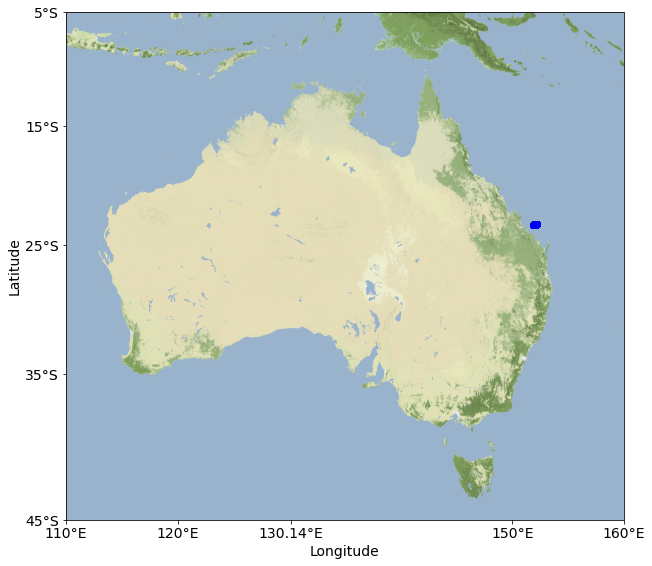

In [32]:
fig = plt.figure(figsize=(10,20))

# Create a GeoAxes in the tile's projection.

ax1 = plt.axes(projection=stamen_terrain.crs)  #standard axes
ax1.set_extent([LONG_min-1.5,LONG_max+1.5, LAT_min-1.5, LAT_max+1.5], crs=ccrs.PlateCarree())
ax1.add_image(stamen_terrain, 8)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_xticks([110,120,130.140,150,160],crs=ccrs.PlateCarree())
ax1.set_yticks([-45,-35,-25,-15,-5],crs=ccrs.PlateCarree())
plt.rcParams.update({'font.size':14})
ax1.plot(glider_data.LONGITUDE,glider_data.LATITUDE,marker='o',color='b',markersize=5,transform=ccrs.PlateCarree(),label='Glider data',linestyle='None')

plt.tight_layout
plt.xlabel('Longitude')
plt.ylabel('Latitude')



## Create T-S diagram

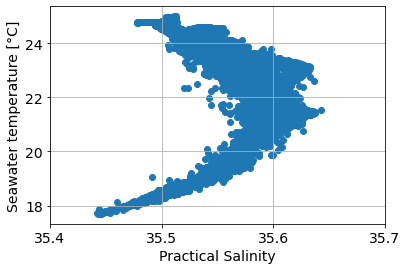

In [38]:
# scatter TEMP vs. PSAL
plt.scatter(PSAL_QC_TS,TEMP_QC_TS)
# add axis labels
plt.xlabel('Practical Salinity')
plt.ylabel('Seawater temperature [\u00b0C]')
# reduce number of ticks
locs, labels = plt.xticks()
plt.tight_layout
plt.xticks(locs[::2])
plt.grid()
